In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

In [2]:
df=pd.read_csv('SBIN.NS.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-03-17,528.650024,531.599976,520.099976,529.799988,519.700867,18787379
1,2023-03-20,526.599976,526.599976,515.000000,519.200012,509.302979,14275315
2,2023-03-21,522.000000,523.450012,516.450012,521.849976,511.902405,29485180
3,2023-03-22,522.200012,527.000000,520.099976,521.549988,511.608154,11619538
4,2023-03-23,519.400024,521.000000,511.500000,512.750000,502.975922,22097792


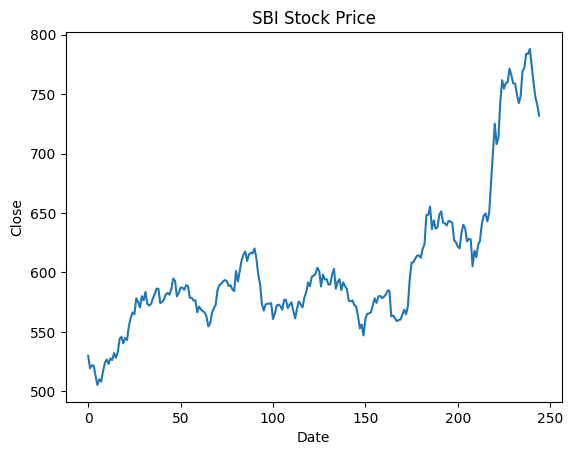

In [3]:
close=df['Close']
ax=close.plot(title="SBI Stock Price")
ax.set_xlabel('Date')
ax.set_ylabel('Close')
plt.show()

In [4]:
df['Date']=pd.to_datetime(df["Date"],infer_datetime_format=True)

C:\Users\ravir\AppData\Local\Temp\ipykernel_14880\2532824917.py:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['Date']=pd.to_datetime(df["Date"],infer_datetime_format=True)


In [5]:
data=df[['Date','Close']]

In [6]:
data=data.rename(columns={"Date":"ds","Close":"y"})

In [7]:
model=Prophet()
model.fit(data)
pred=model.make_future_dataframe(periods=365)
forcast=model.predict(pred)
forcast[['ds','yhat','yhat_lower','yhat_upper']].tail()

09:49:16 - cmdstanpy - INFO - Chain [1] start processing
09:49:17 - cmdstanpy - INFO - Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper
605,2025-03-11,1479.598675,1242.756194,1717.692894
606,2025-03-12,1481.167324,1243.810394,1725.288510
607,2025-03-13,1483.719191,1245.887260,1725.950614
608,2025-03-14,1487.049777,1242.760544,1729.651967
609,2025-03-15,1495.604089,1250.725240,1730.900792


c:\Users\ravir\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\ravir\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


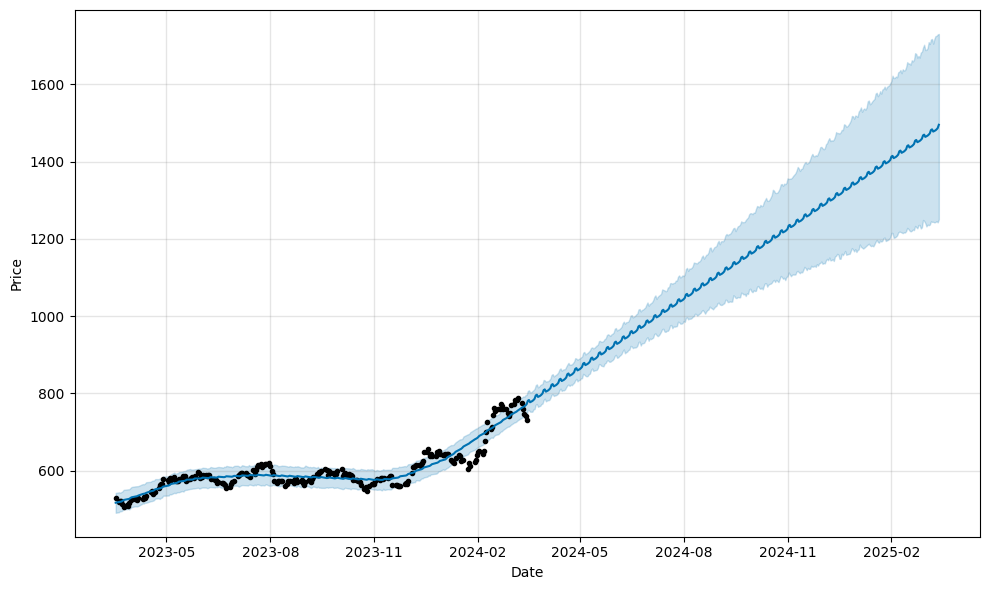

In [8]:
graph=model.plot(forcast,xlabel="Date",ylabel="Price")

In [9]:
evaluation_start_date = '2023-01-01'
evaluation_end_date = '2023-12-31'

actual_data = data[(data['ds'] >= evaluation_start_date) & (data['ds'] <= evaluation_end_date)]

merged_data = pd.merge(actual_data, forcast, on='ds')

def calculate_mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = calculate_mape(merged_data['y'], merged_data['yhat'])
print("Mean Absolute Percentage Error (MAPE):", mape)


Mean Absolute Percentage Error (MAPE): 2.13636700757899
